In [12]:
# !pip install seaborn==0.10.0
# !pip install scikit-learn==0.22.1

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary.csv')
df.head(10)

,salary
0,26100
1,73188
2,33333333333
3,14623
4,44444444444
5,95759
6,22368
7,90715
8,18507
9,11559


In [3]:
df.shape

(20, 1)

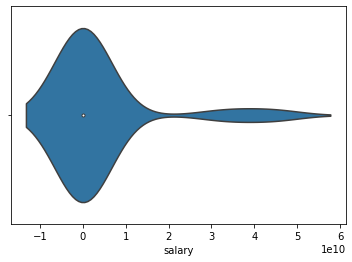

In [4]:
sns.violinplot(df.salary)

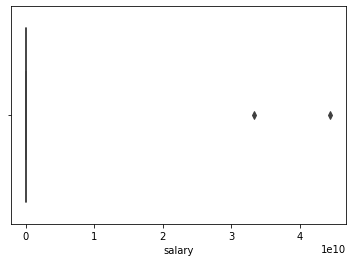

In [5]:
sns.boxplot(df.salary)

In [6]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['salary']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [7]:
df['scores']=model.decision_function(df[['salary']])
df['anomaly']=model.predict(df[['salary']])
df.head(20)

,salary,scores,anomaly
0,26100,0.112563,1
1,73188,0.038838,1
2,33333333333,-0.193363,-1
3,14623,0.143566,1
4,44444444444,-0.220598,-1
5,95759,0.110229,1
6,22368,0.142790,1
7,90715,0.021485,1
8,18507,0.115514,1
9,11559,0.099727,1


In [8]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

        salary    scores  anomaly
2  33333333333 -0.193363       -1
4  44444444444 -0.220598       -1


In [9]:
# setting thresold as salary > 99999 as outlier
outliers_counter = len(df[df['salary'] > 99999])
outliers_counter

2

In [10]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 100.0
